<a href="https://colab.research.google.com/github/prajapatibhaskar/number-prediction-from-image/blob/main/Predicting_Numbers_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Numbers in Images**

-------------

## **Objective**
The objective is to be create a machine learning model to `predict numbers` `represented as images` using the digits dataset.

# **Data Source**
A dataset of `handwritten images` from the `sklearn.datasets` module, specifically the `load_digits()` function.

## **Import Libraries**

In [88]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

## **Import Data**

In [89]:
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

## **Describe Data**

In [90]:
# Examinig the Image data
print(digits.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

In [91]:
# Examining the Labels
print(digits.target)

[0 1 2 ... 8 9 8]


## **Data Visualization**

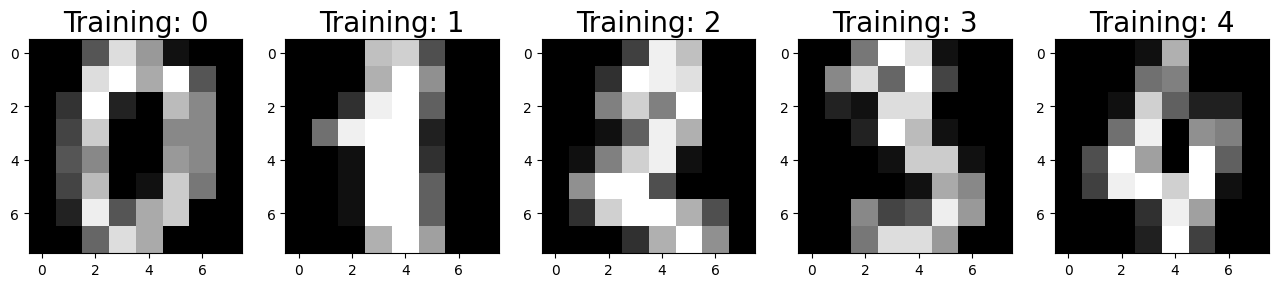

In [92]:
plt.figure(figsize = (16, 4))
for index, (image, label) in enumerate(zip(digits.images[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(image, cmap = plt.cm.gray)
  plt.title('Training: %i' % label, fontsize = 20)

We get a figure with `five subplots`, each displaying one of the first five images from the dataset along with its corresponding `label` (the digit it represents). The images are shown in `grayscale`.


---



## **Data Preprocessing**
1. The dataset consists of `digits.images` which represents the raw image data in 2D arrays.
2. `digits.images` will serve as the `X` data matrix for model building with `scikit-learn`. But before it can be used we will need to pre-process it by flattening the image.
3. Flattening refers to converting each 2D array representing an image into a 1D array.
4. The preprocessed or flattened `digits.images` will essentially become identical to the provided `digits.data`.

In [93]:
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)
print(data.shape)

(1797, 64)


## **Describe Data**

In [94]:
#Examining the processed images
print(data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [95]:
#Dimensions of the Original Image Data
print(digits.images.shape)

(1797, 8, 8)


In [96]:
#Dimensions of Reshaped Data
print(data.shape)

(1797, 64)


## **Define Feature Variables (X) and Target Variable (y)**

In [97]:
X = data
y = digits.target



---


## **Train Test Split**

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state = 2)

`77%` for Training and `23%` for Testing

In [99]:
# Shape of Train Test Sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1383, 64), (414, 64), (1383,), (414,))



---


## **Modeling**

In [100]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=5000)

logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)



---


### **Predicting for One Image**

In [101]:
print(logisticRegr.predict(X_test[0].reshape(1, -1)))

[4]


## **Prediction**

In [102]:
# Predict the value of the digits on the test subset
predictions = logisticRegr.predict(X_test)

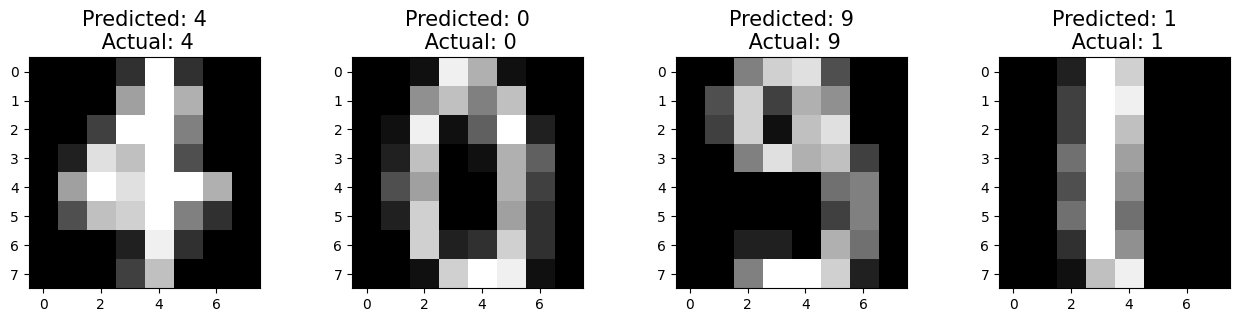

In [103]:
# Correct Predictions ✔️
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
  if predict == actual:
    classifiedIndex.append(index)
  index += 1

plt.figure(figsize=(16, 3))
for plotIndex, correct in enumerate(classifiedIndex[0:4]):
  plt.subplot(1, 4, plotIndex + 1)
  plt.imshow(np.reshape(X_test[correct], (8, 8)), cmap = plt.cm.gray)
  plt.title('Predicted: {}\n Actual: {}'.format(predictions[correct], y_test[correct]), fontsize = 15)

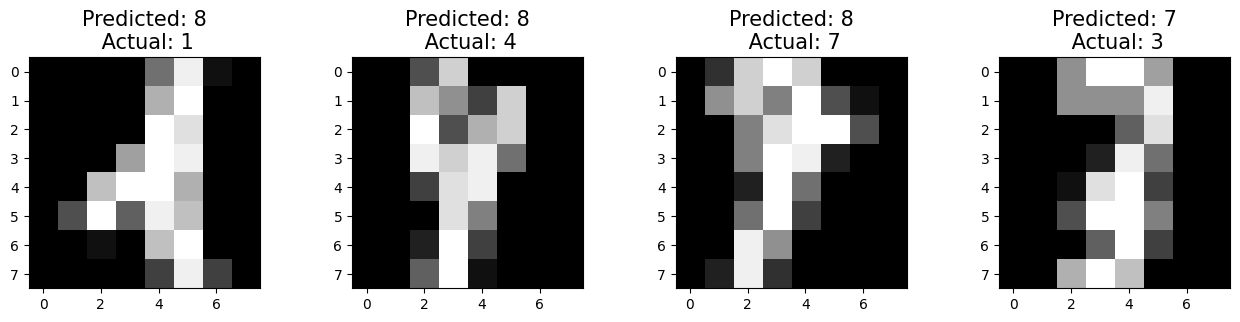

In [104]:
# Wrong Predictions ❌
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
  if predict != actual:
    classifiedIndex.append(index)
  index += 1

plt.figure(figsize=(16, 3))
for plotIndex, wrong in enumerate(classifiedIndex[4:8]):
  plt.subplot(1, 4, plotIndex + 1)
  plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap = plt.cm.gray)
  plt.title('Predicted: {}\n Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 15)



---


## **Model Evaluation**

In [105]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9492753623188406


In [106]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  2  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  1  0  0  0 36  1]
 [ 0  0  0  1  0  1  0  0  1 31]]


Text(0.5, 1.0, 'Accuracy Score : 0.9492753623188406')

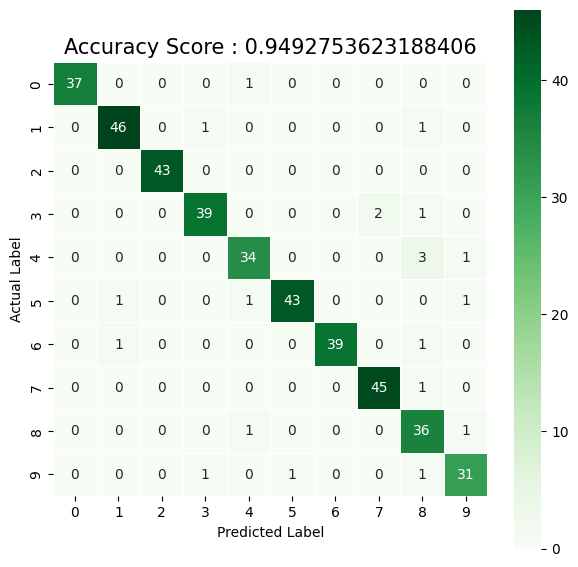

In [107]:
plt.figure(figsize = (7, 7))
sns.heatmap(cm, annot = True, linewidths = .5, square = True, cmap = 'Greens')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title, size = 15)

We can see a `heatmap` visualization of the data in the confusion matrix `cm`,
using `sns.heatmap` from the `Seaborn library`,



---


## **Explaination**

1. We start by loading a bunch of `handwritten digits` and their `labels` into our program. These digits are images, and we take a peek at them to see what they look like.

2. Then, we teach the computer to recognize them. To do that, we `split` the images into groups, some for `training` the computer and some for `testing` how well it learned.

3. We choose a smart algorithm called `logistic regression` to train the computer, to identify these handwritten digits.

4. Once the training is done, we let the computer look at `new images` it hasn't seen before and ask it to guess the numbers.

5. To understand where the computer struggles, we print a few images it `guessed correctly` and a few where it `made mistakes`. This helps us see how good the computer is at this task.

6. Finally, we create a colorful chart called a `Heatmap`(from the confusion matrix) that summarizes how accurate the computer was overall.